In [26]:
# importing libraries
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data 
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots
       

In [27]:
# reading the data set
data = pd.read_csv('shopping_trends.csv')

1. What is the overall distribution of customer ages in the dataset?

Age Statistics:
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


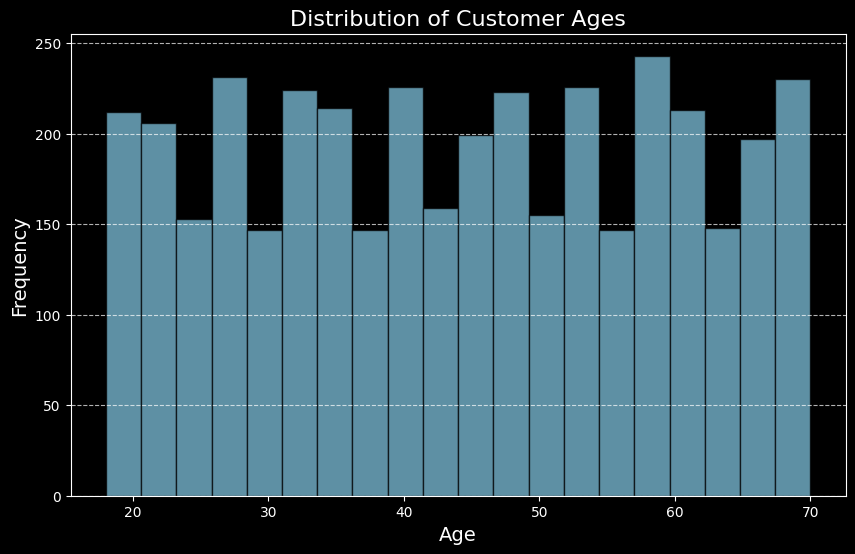

In [77]:
# Descriptive statistics for the Age column
age_stats = data['Age'].describe()
print("Age Statistics:")
print(age_stats)

# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2.	How does the average purchase amount vary across different product categories?

Average Purchase Amount by Product Category:
Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


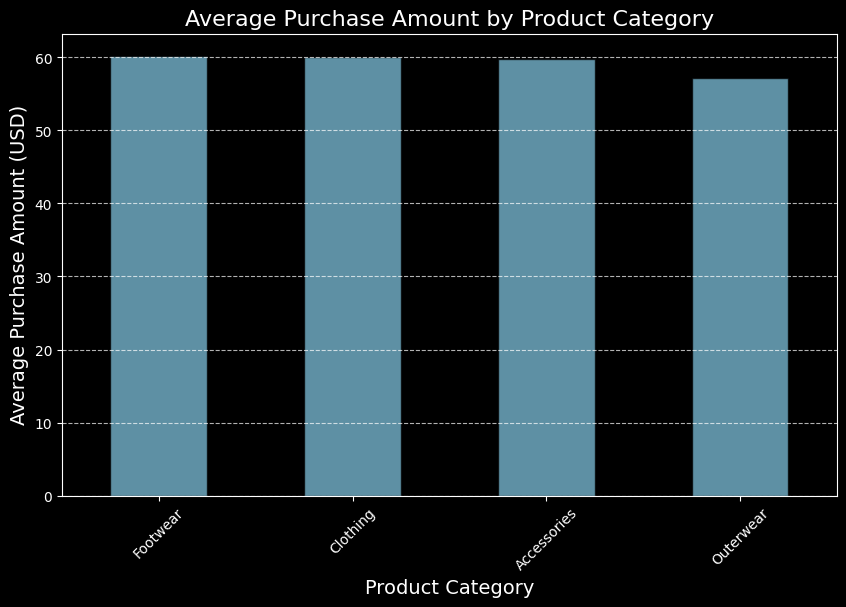

In [76]:
# Calculate the average purchase amount for each product category
category_avg_purchase = data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Display the results
print("Average Purchase Amount by Product Category:")
print(category_avg_purchase)

# Plot the average purchase amount for each product category
plt.figure(figsize=(10, 6))
category_avg_purchase.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Purchase Amount by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3.	Which gender has the highest number of purchases?

Number of Purchases by Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


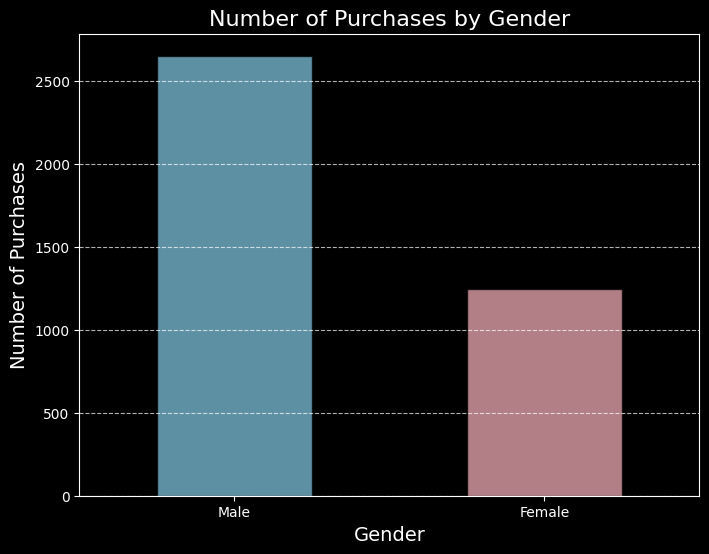

In [30]:
# Count the number of purchases by gender
gender_purchase_count = data['Gender'].value_counts()

# Display the results
print("Number of Purchases by Gender:")
print(gender_purchase_count)

# Plot the number of purchases by gender
plt.figure(figsize=(8, 6))
gender_purchase_count.plot(kind='bar', color=['skyblue', 'lightpink'], edgecolor='black', alpha=0.7)
plt.title('Number of Purchases by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4.	What are the most commonly purchased items in each category?

Most Commonly Purchased Items in Each Category:
Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


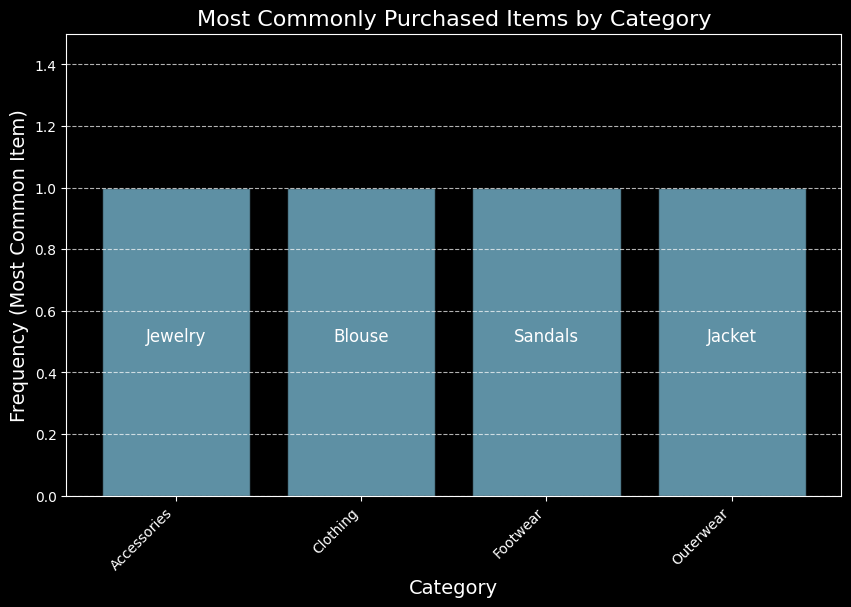

In [31]:
# Identify the most commonly purchased items in each category
most_common_items = data.groupby('Category')['Item Purchased'].agg(lambda x: x.mode().iloc[0])

# Display the results
print("Most Commonly Purchased Items in Each Category:")
print(most_common_items)

# Plot the most commonly purchased items in each category
plt.figure(figsize=(10, 6))
plt.bar(most_common_items.index, [1] * len(most_common_items), color='skyblue', edgecolor='black', alpha=0.7)

# Annotate the bars with the item names
for index, value in enumerate(most_common_items):
    plt.text(index, 0.5, value, ha='center', fontsize=12)

plt.title('Most Commonly Purchased Items by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency (Most Common Item)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5.	Are there any specific seasons or months where customer spending is significantly higher?

In [61]:
# Plot total spending by season with simplified colors
import plotly.express as px

fig = px.bar(
    season_analysis,
    x=season_analysis.index,
    y='Total Spending (USD)',
    text='Total Spending (USD)',
    color_discrete_sequence=['skyblue'],  
    title='Customer Spending by Season',
    labels={'x': 'Season', 'y': 'Total Spending (USD)'},
    height=500
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    showlegend=False,
    xaxis_title='Season',
    yaxis_title='Total Spending (USD)',
    title_font_size=16,
    xaxis_tickangle=0
)
fig.show()


6.	What is the average rating given by customers for each product category?

Category
Footwear       3.790651
Accessories    3.768629
Outerwear      3.746914
Clothing       3.723143
Name: Review Rating, dtype: float64


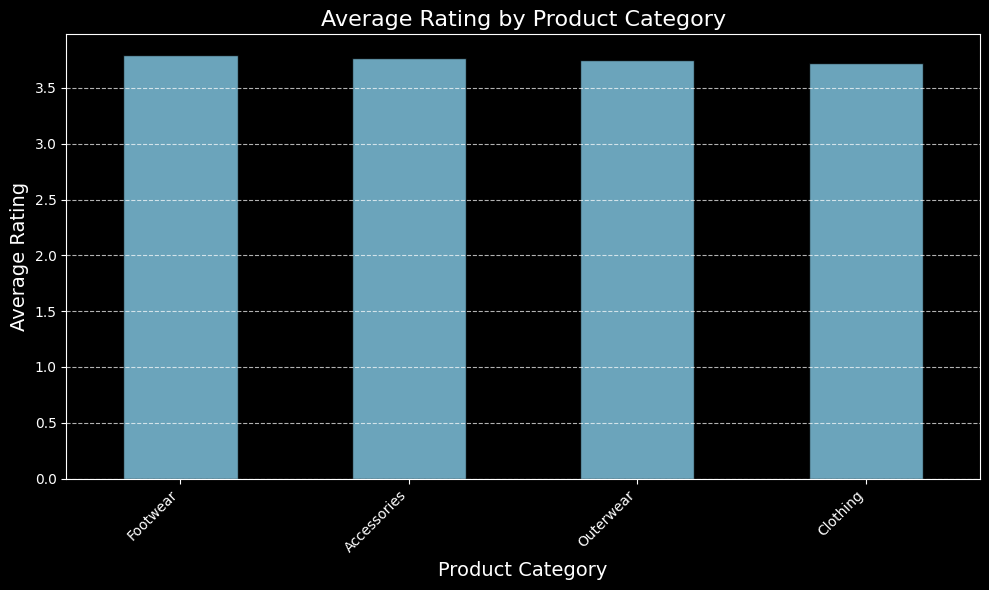

In [62]:
# Calculate the average rating for each product category
average_rating_by_category = data.groupby('Category')['Review Rating'].mean().sort_values(ascending=False)

# Display the results
print(average_rating_by_category)

# Plot the average rating by product category
plt.figure(figsize=(10, 6))
average_rating_by_category.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Average Rating by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


7.	Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

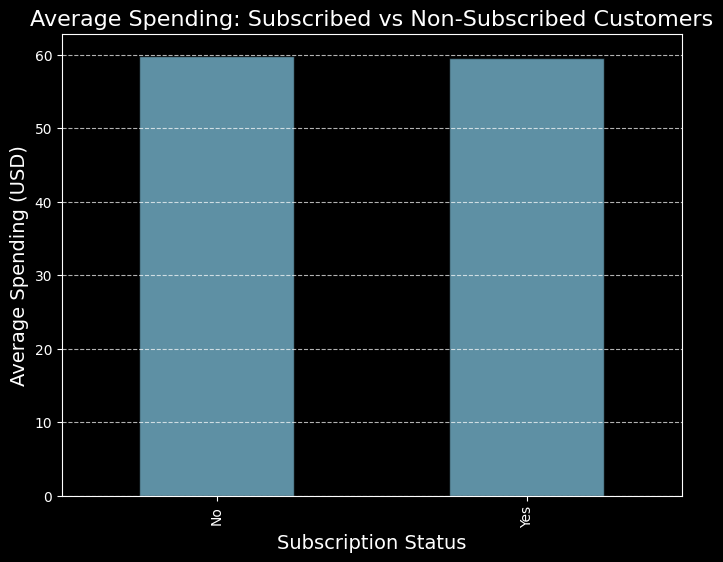

In [64]:
# Group by 'Subscription Status' and calculate the average purchase amount
subscription_spending = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
subscription_spending.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Spending: Subscribed vs Non-Subscribed Customers', fontsize=16)
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Average Spending (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

8.	Which payment method is the most popular among customers?

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


<Axes: title={'center': 'Most Popular Payment Methods'}, xlabel='Payment Method'>

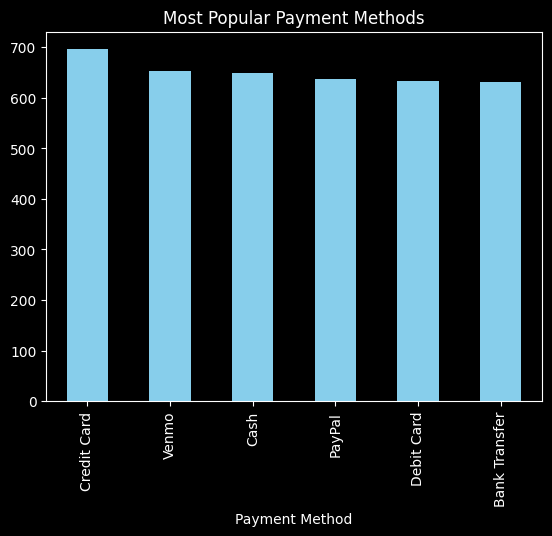

In [37]:
popular_payment_method = data['Payment Method'].value_counts()
print(popular_payment_method)
popular_payment_method.plot(kind='bar', color='skyblue', title='Most Popular Payment Methods')


9.	Do customers who use promo codes tend to spend more than those who don't?

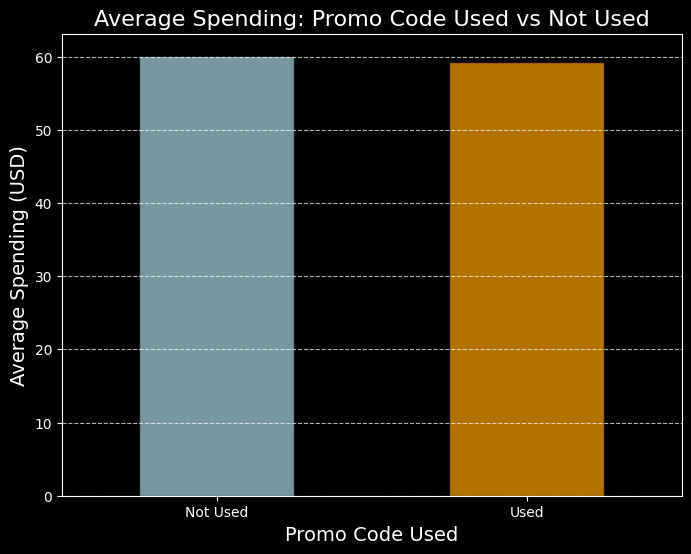

In [41]:
# Group by 'Promo Code Used' and calculate the average purchase amount
promo_spending = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
promo_spending.plot(kind='bar', color=['lightblue', 'orange'], edgecolor='black', alpha=0.7)
plt.title('Average Spending: Promo Code Used vs Not Used', fontsize=16)
plt.xlabel('Promo Code Used', fontsize=14)
plt.ylabel('Average Spending (USD)', fontsize=14)
plt.xticks([0, 1], labels=['Not Used', 'Used'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


10.	How does the frequency of purchases vary across different age groups?

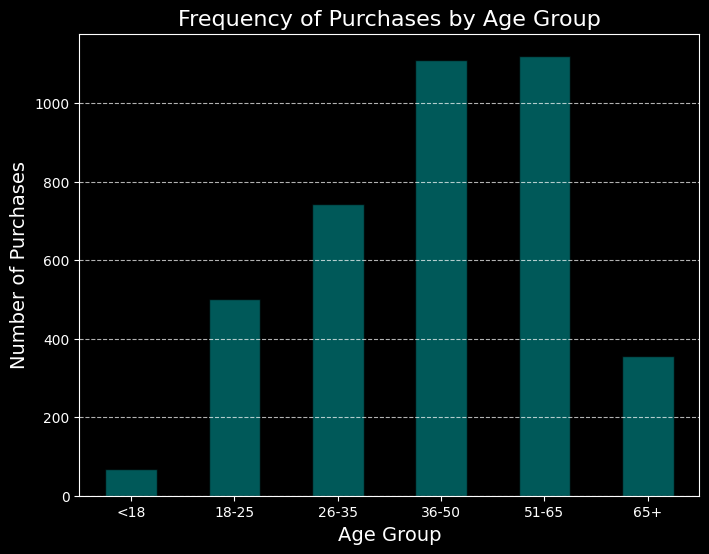

In [42]:
# Define age groups
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Group by 'Age Group' and calculate the number of purchases
purchase_frequency_by_age = data['Age Group'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(8, 6))
purchase_frequency_by_age.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.title('Frequency of Purchases by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


11.	Are there any correlations between the size of the product and the purchase amount?

In [66]:
fig = px.bar(
    shop_group,
    x='Size',
    y='Purchase Amount (USD)',
    text='Purchase Amount (USD)',
    color_discrete_sequence=['skyblue'],  # Simplified color
    title='Total Purchase Amount by Product Size',
    labels={'Size': 'Product Size', 'Purchase Amount (USD)': 'Total Purchase Amount (USD)'},
    height=500
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Product Size',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=16,
    xaxis_tickangle=0,
    showlegend=False
)
fig.show()


12.	Which shipping type is preferred by customers for different product categories?

In [ ]:
# Group by 'Category' and count the occurrences of each 'Shipping Type'
shipping_preference = shop.groupby('Category')['Shipping Type'].value_counts().reset_index(name='Count')

# Display the top rows of the result
print(shipping_preference)

# Plot the preferred shipping types for each category
import plotly.express as px

fig = px.bar(
    shipping_preference,
    x='Category',
    y='Count',
    color='Shipping Type',
    text='Count',
    title='Preferred Shipping Type by Product Category',
    labels={'Count': 'Number of Customers', 'Category': 'Product Category'},
    height=500
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Number of Customers',
    title_font_size=16,
)
fig.show()


       Category   Shipping Type  Count
0   Accessories    Store Pickup    217
1   Accessories    Next Day Air    211
2   Accessories        Standard    208
3   Accessories  2-Day Shipping    206
4   Accessories         Express    203
5   Accessories   Free Shipping    195
6      Clothing        Standard    297
7      Clothing   Free Shipping    294
8      Clothing    Next Day Air    293
9      Clothing         Express    290
10     Clothing    Store Pickup    282
11     Clothing  2-Day Shipping    281
12     Footwear   Free Shipping    122
13     Footwear        Standard    100
14     Footwear    Store Pickup     98
15     Footwear         Express     96
16     Footwear    Next Day Air     93
17     Footwear  2-Day Shipping     90
18    Outerwear   Free Shipping     64
19    Outerwear         Express     57
20    Outerwear    Store Pickup     53
21    Outerwear    Next Day Air     51
22    Outerwear  2-Day Shipping     50
23    Outerwear        Standard     49


13.	How does the presence of a discount affect the purchase decision of customers?

In [68]:
# Group by 'Discount Applied' and calculate the total purchase amount
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

# Plot the impact of discount on purchase amount
import plotly.express as px

fig = px.bar(
    shop_group,
    x='Discount Applied',
    y='Purchase Amount (USD)',
    text='Purchase Amount (USD)',
    color_discrete_sequence=['skyblue'],  # Simplified color
    title='Impact of Discount on Purchase Amount',
    labels={
        'Discount Applied': 'Discount Applied (Yes/No)',
        'Purchase Amount (USD)': 'Total Purchase Amount (USD)'
    },
    height=500
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Discount Applied',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=16,
    xaxis_tickangle=0,
    showlegend=False
)
fig.show()


14.	Are there any specific colors that are more popular among customers?

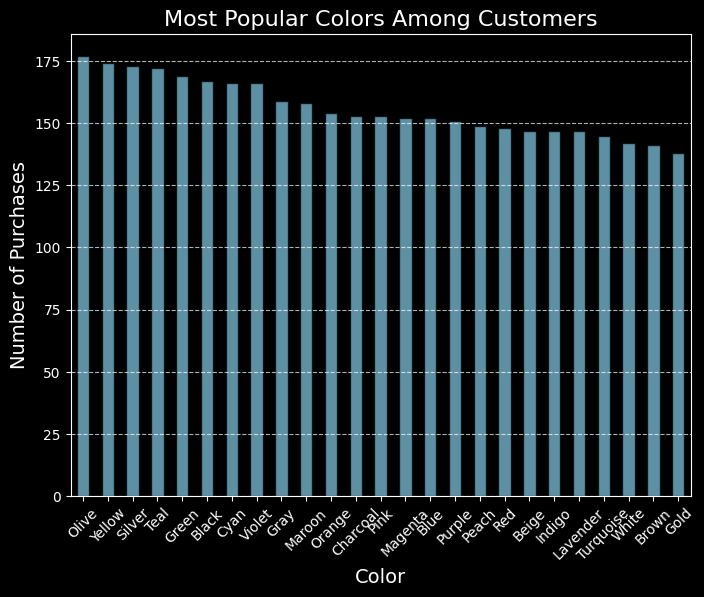

In [53]:
# Count the popularity of each color
popular_colors = data['Color'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
popular_colors.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Most Popular Colors Among Customers', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


15.	What is the average number of previous purchases made by customers?

In [54]:
# Calculate the average number of previous purchases
average_previous_purchases = data['Previous Purchases'].mean()
print(f"Average number of previous purchases: {average_previous_purchases:.2f}")


Average number of previous purchases: 25.35


16.	How does the purchase amount differ based on the review ratings given by customers?

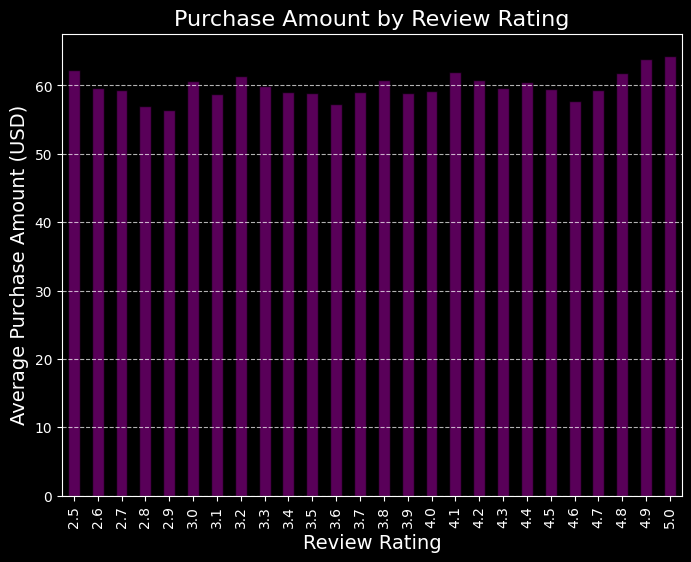

In [55]:
# Group by review ratings and calculate average purchase amount
rating_purchase_amount = data.groupby('Review Rating')['Purchase Amount (USD)'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
rating_purchase_amount.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.title('Purchase Amount by Review Rating', fontsize=16)
plt.xlabel('Review Rating', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


17.	Are there any noticeable differences in purchase behavior between different locations?

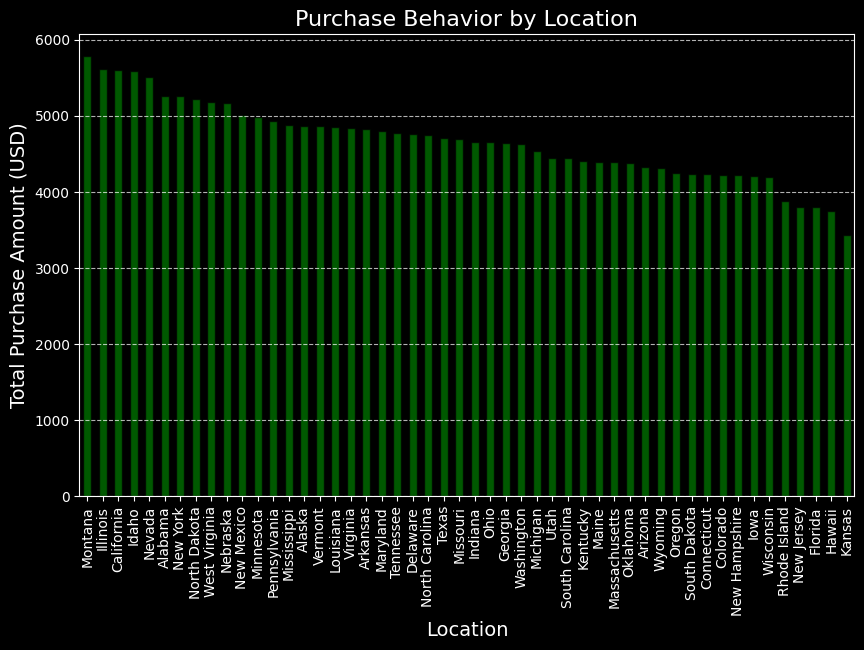

In [79]:
# Group by location and calculate total purchase amount
location_purchase_behavior = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
location_purchase_behavior.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Purchase Behavior by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


18.	Is there a relationship between customer age and the category of products they purchase?

In [69]:
# Group data by 'Age' and 'Category' to calculate total purchase amount
age_category_group = shop.groupby(['Age', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Plot the relationship between Age and Product Category purchases
import plotly.express as px

fig = px.bar(
    age_category_group,
    x='Age',
    y='Purchase Amount (USD)',
    color='Category',
    title='Relationship Between Customer Age and Product Categories',
    labels={'Age': 'Customer Age', 'Purchase Amount (USD)': 'Total Purchase Amount (USD)'},
    text='Purchase Amount (USD)',
    height=600
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Customer Age',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=16,
    xaxis_tickangle=45
)
fig.show()


19.	How does the average purchase amount differ between male and female customers?

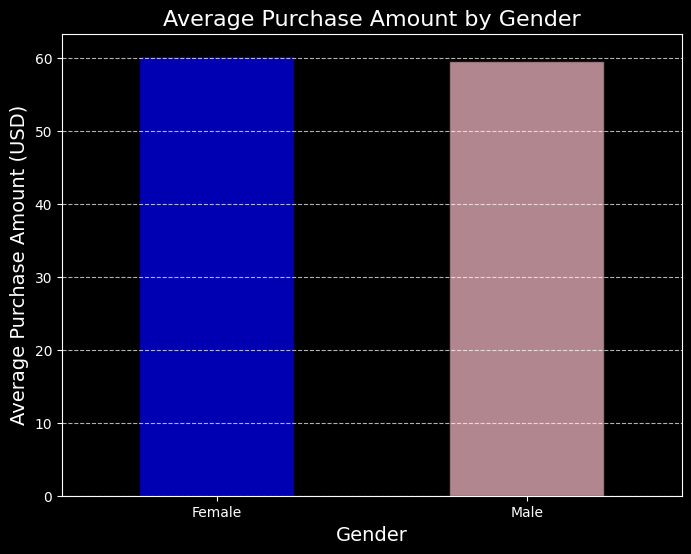

In [58]:
# Group by gender and calculate average purchase amount
gender_purchase_amount = data.groupby('Gender')['Purchase Amount (USD)'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
gender_purchase_amount.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Average Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
